In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json(r'D:\Study\Project\Major project\Bio analysis\influencer_data.json')

In [3]:
df.columns

Index(['inputUrl', 'id', 'username', 'url', 'fullName', 'biography',
       'followersCount', 'followsCount', 'hasChannel', 'highlightReelCount',
       'isBusinessAccount', 'joinedRecently', 'businessCategoryName',
       'private', 'verified', 'profilePicUrl', 'profilePicUrlHD',
       'igtvVideoCount', 'relatedProfiles', 'latestIgtvVideos', 'postsCount',
       'latestPosts', 'externalUrl', 'externalUrlShimmed', 'error',
       'isRestrictedProfile', 'restrictionReason'],
      dtype='object')

In [4]:
df = df[['inputUrl', 'username', 'fullName', 'biography', 'followersCount', 'followsCount', 'businessCategoryName', 'postsCount']]

In [5]:
df.head()

,inputUrl,username,fullName,biography,followersCount,followsCount,businessCategoryName,postsCount
0,https://www.instagram.com/basicallymenz,basicallymenz,Sandeep Rai,•Lawyer •Lifestyle •Luxury •Fashion\n📍 DEL | D...,73962.0,633.0,Digital creator,555.0
1,https://www.instagram.com/wongi95,wongi95,Issy Wong,Cricketer | Tailender\n@dscfearlessuk 🏏YNWA🔴\n...,116581.0,820.0,"None,Athlete",248.0
2,https://www.instagram.com/aneezv,aneezv,Mohammed Aneez,Minimalist. Storyteller. Photographer.\nUAE 🔁 ...,84956.0,1913.0,"None,Photographer",1166.0
3,https://www.instagram.com/__vastrakarp11__,__vastrakarp11__,Pooja Vastrakar,90s kid 🎵🧿🐼\n@fairplaysports_in,90691.0,563.0,Athlete,108.0
4,https://www.instagram.com/scorpionexo,scorpionexo,ScorpionEXO (North America),Manufacturing Premium Motorcycle Helmets Since...,65207.0,218.0,"None,Digital creator",2868.0


In [6]:
df['follower/post'] = ''

In [7]:
df['followersCount'].value_counts(0)

followersCount
95357.0    4
6610.0     3
5764.0     3
8075.0     3
6877.0     3
          ..
8577.0     1
8337.0     1
8541.0     1
8555.0     1
11053.0    1
Name: count, Length: 3651, dtype: int64

In [8]:
for index, row in df.iterrows():
    if row['postsCount'] == 0.0:
        df.loc[index, 'follower/post'] = 0
    else:
        df.loc[index, 'follower/post'] = row['followersCount'] / row['postsCount']

In [9]:
df.head()

,inputUrl,username,fullName,biography,followersCount,followsCount,businessCategoryName,postsCount,follower/post
0,https://www.instagram.com/basicallymenz,basicallymenz,Sandeep Rai,•Lawyer •Lifestyle •Luxury •Fashion\n📍 DEL | D...,73962.0,633.0,Digital creator,555.0,133.264865
1,https://www.instagram.com/wongi95,wongi95,Issy Wong,Cricketer | Tailender\n@dscfearlessuk 🏏YNWA🔴\n...,116581.0,820.0,"None,Athlete",248.0,470.084677
2,https://www.instagram.com/aneezv,aneezv,Mohammed Aneez,Minimalist. Storyteller. Photographer.\nUAE 🔁 ...,84956.0,1913.0,"None,Photographer",1166.0,72.861063
3,https://www.instagram.com/__vastrakarp11__,__vastrakarp11__,Pooja Vastrakar,90s kid 🎵🧿🐼\n@fairplaysports_in,90691.0,563.0,Athlete,108.0,839.731481
4,https://www.instagram.com/scorpionexo,scorpionexo,ScorpionEXO (North America),Manufacturing Premium Motorcycle Helmets Since...,65207.0,218.0,"None,Digital creator",2868.0,22.736053


In [10]:
df.to_excel('Influencer_bio_analysis_data.xlsx', index=False)

In [11]:
new_df = pd.read_excel(r"D:\Study\Project\Major project\Quadrant Analysis\All_quadrants_microinf_combined.xlsx")

In [12]:
new_df.head()

,Category,Quadrant,Influencers
0,Automobile,HF-HE,hkmatthews50
1,Automobile,HF-HE,dhillon_balbir
2,Automobile,HF-HE,wongi95
3,Automobile,HF-HE,aneezv
4,Automobile,HF-HE,__vastrakarp11__


In [13]:
if 'username' in df.columns and 'Influencers' in new_df.columns:
    merged_df = new_df.merge(df[['username', 'follower/post']], left_on='Influencers', right_on='username', how='left')
    merged_df = merged_df.drop(columns=['username'])
    new_df = merged_df
    print(new_df.head())
else:
    print("Required columns are missing in the DataFrames.")

     Category Quadrant       Influencers follower/post
0  Automobile    HF-HE      hkmatthews50    513.389163
1  Automobile    HF-HE    dhillon_balbir     289.92145
2  Automobile    HF-HE           wongi95    470.084677
3  Automobile    HF-HE            aneezv     72.861063
4  Automobile    HF-HE  __vastrakarp11__    839.731481


In [14]:
new_df.to_excel('inf_with_follower-post_ratio.xlsx', index=False)

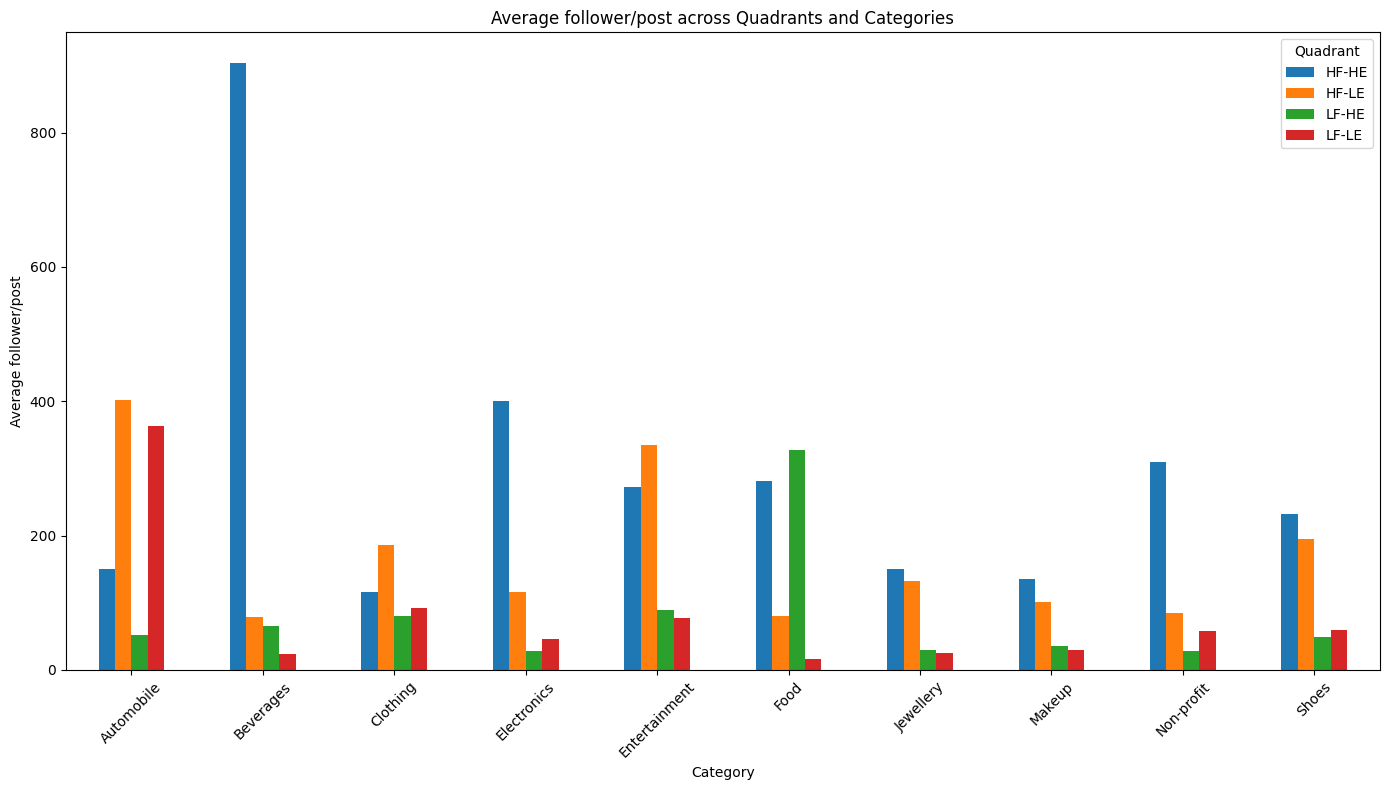

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df contains the relevant data
# First, ensure that 'follower/post' is numeric
new_df['follower/post'] = pd.to_numeric(new_df['follower/post'], errors='coerce')

# Calculate the average follower/post for each quadrant within each category
average_df = new_df.groupby(['Category', 'Quadrant'])['follower/post'].mean().reset_index()

# Pivot the dataframe for better plotting
pivot_df = average_df.pivot(index='Category', columns='Quadrant', values='follower/post')

# Plotting
pivot_df.plot(kind='bar', figsize=(14, 8))
plt.title('Average follower/post across Quadrants and Categories')
plt.ylabel('Average follower/post')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Quadrant')
plt.tight_layout()
plt.show()


In [16]:
import os
import shutil
import pandas as pd

# Define paths
excel_path = 'D://Study//Project//Major project//Bio analysis//inf_with_follower-post_ratio.xlsx'
image_folder = 'D://Study//Project//Major project//Bio analysis//inf_image'
output_folder = 'D://Study//Project//Major project//Bio analysis//four_quad_image'

# Read influencer names from Excel file
df = pd.read_excel(excel_path)

# Get list of influencer names
influencers = df['Influencers'].tolist()

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Iterate through the image folder and move matched images
for img_file in os.listdir(image_folder):
    img_name, img_ext = os.path.splitext(img_file)
    if img_name in influencers:
        shutil.move(os.path.join(image_folder, img_file), os.path.join(output_folder, img_file))
        print(f"Moved: {img_file}")

print("Image separation completed.")


Image separation completed.
